In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

In [2]:
with open('out.txt', 'r') as f:
    lines = f.readlines()
lines

['Epoch: 1 [0], loss: 238.580, acc: 0.008\n',
 'Epoch: 1 [50], loss: 7.466, acc: 0.625\n',
 'Epoch: 1 [100], loss: 3.861, acc: 0.702\n',
 'Epoch: 1 [150], loss: 2.709, acc: 0.742\n',
 'Epoch: 1 [200], loss: 1.981, acc: 0.782\n',
 'Epoch: 1 [250], loss: 1.709, acc: 0.800\n',
 'Epoch: 1 [300], loss: 1.414, acc: 0.792\n',
 'Epoch: 1 [350], loss: 1.309, acc: 0.808\n',
 'Epoch: 1 [400], loss: 1.032, acc: 0.820\n',
 'Epoch: 1 [450], loss: 0.917, acc: 0.830\n',
 'Epoch: 1 [500], loss: 0.773, acc: 0.839\n',
 'Epoch: 1 [550], loss: 0.824, acc: 0.820\n',
 'Epoch: 1 [600], loss: 0.749, acc: 0.851\n',
 'Epoch: 1 [650], loss: 0.621, acc: 0.852\n',
 'Epoch: 1 [700], loss: 0.602, acc: 0.850\n',
 'Epoch: 1 [750], loss: 0.550, acc: 0.863\n',
 'Epoch: 1 [800], loss: 0.517, acc: 0.870\n',
 'Epoch: 1 [850], loss: 0.576, acc: 0.860\n',
 'Epoch: 1 [900], loss: 0.562, acc: 0.860\n',
 'End of epoch\n',
 'Saving current state of model to saved_weights\\parser-epoch-1.mdl\n',
 'Evaluating on valudation data aft

In [3]:
def fill_df(lines):
    df = pd.DataFrame({'epoch':[], 'loss':[], 'acc': []})
    for l in lines:
        if "Epoch" in l:
            groups = re.search(r"Epoch: ([1-5]) \[[0-9]+\], loss: ([0-9\.]+), acc: ([0-9\.]+)", l).groups()
            df = df.append({'epoch':float(groups[0]), 'loss':float(groups[1]), 'acc': float(groups[2])}, ignore_index=True)
    return df

In [4]:
list_5 = list(range(1,6))

In [5]:
df = fill_df(lines)
uas = pd.DataFrame({'epoch': list_5, 'uas':[76.47, 80.42, 82.41, 83.12, 83.94]})

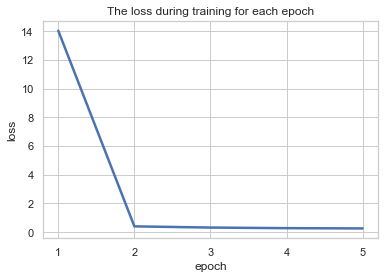

In [6]:
f = sns.lineplot(x='epoch', y='loss', data=df, ci=None, linewidth=2.5)
f.set_xticks(list_5)
plt.title('The loss during training for each epoch')
plt.savefig("loss.png", dpi=400)

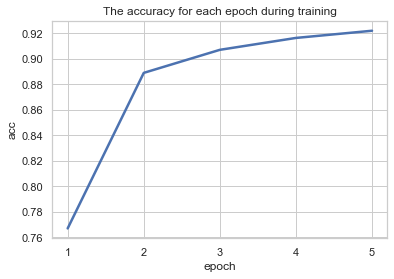

In [7]:
f = sns.lineplot(x='epoch', y='acc', data=df, ci=None, linewidth=2.5)
f.set_xticks(list_5)
plt.title('The accuracy for each epoch during training')
plt.savefig("acc.png", dpi=400)

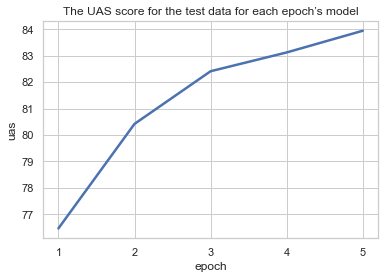

In [8]:
f = sns.lineplot(x='epoch', y='uas', data=uas, ci=None, linewidth=2.5)
f.set_xticks(list_5)
plt.title('The UAS score for the test data for each epoch’s model')
plt.savefig("uas.png", dpi=400)

In [9]:
df['model'] = "old"
uas['model'] = "old"

In [10]:
with open('out-another.txt', 'r') as f:
    lines_another = f.readlines()
lines_another

['Epoch: 1 [0], loss: 4.562, acc: 0.005\n',
 'Epoch: 1 [50], loss: 3.123, acc: 0.493\n',
 'Epoch: 1 [100], loss: 2.607, acc: 0.539\n',
 'Epoch: 1 [150], loss: 2.139, acc: 0.613\n',
 'Epoch: 1 [200], loss: 1.689, acc: 0.702\n',
 'Epoch: 1 [250], loss: 1.284, acc: 0.771\n',
 'Epoch: 1 [300], loss: 1.158, acc: 0.783\n',
 'Epoch: 1 [350], loss: 0.941, acc: 0.816\n',
 'Epoch: 1 [400], loss: 0.889, acc: 0.811\n',
 'Epoch: 1 [450], loss: 0.838, acc: 0.817\n',
 'Epoch: 1 [500], loss: 0.809, acc: 0.826\n',
 'Epoch: 1 [550], loss: 0.748, acc: 0.836\n',
 'Epoch: 1 [600], loss: 0.703, acc: 0.841\n',
 'Epoch: 1 [650], loss: 0.647, acc: 0.855\n',
 'Epoch: 1 [700], loss: 0.589, acc: 0.863\n',
 'Epoch: 1 [750], loss: 0.574, acc: 0.870\n',
 'Epoch: 1 [800], loss: 0.556, acc: 0.869\n',
 'Epoch: 1 [850], loss: 0.527, acc: 0.883\n',
 'Epoch: 1 [900], loss: 0.561, acc: 0.868\n',
 'End of epoch\n',
 'Saving current state of model to saved_weights\\parser-epoch-1.mdl\n',
 'Evaluating on valudation data after

In [11]:
df_another = fill_df(lines_another)
uas_another = pd.DataFrame({'epoch': list_5, 'uas':[81.32, 84.69, 85.40, 85.84, 86.31]})

In [12]:
df_another['model'] = "new"
uas_another['model'] = "new"

In [13]:
df = pd.concat([df, df_another]).reset_index(drop=True)
uas = pd.concat([uas, uas_another]).reset_index(drop=True)

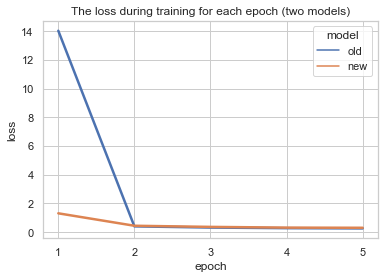

In [14]:
f = sns.lineplot(x='epoch', y='loss', data=df, hue='model', ci=None, linewidth=2.5)
f.set_xticks(list_5)
plt.title('The loss during training for each epoch (two models)')
plt.savefig("loss_new.png", dpi=400)

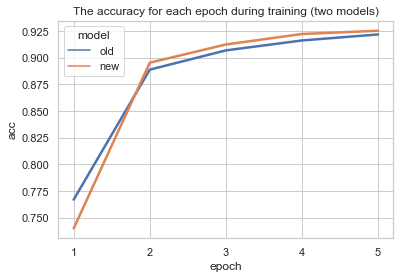

In [15]:
f = sns.lineplot(x='epoch', y='acc', data=df, hue='model',ci=None, linewidth=2.5)
f.set_xticks(list_5)
plt.title('The accuracy for each epoch during training (two models)')
plt.savefig("acc_new.png", dpi=400)

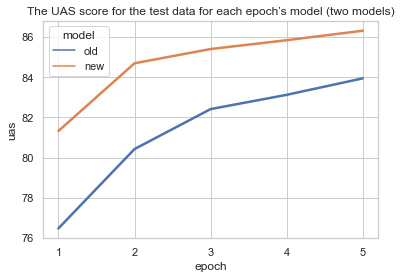

In [16]:
f = sns.lineplot(x='epoch', y='uas', data=uas, hue='model', ci='None', linewidth=2.5)
f.set_xticks(list_5)
plt.title('The UAS score for the test data for each epoch’s model (two models)')
plt.savefig("uas_new.png", dpi=400)